In [1]:
import tensorflow as tf
#import keras
import matplotlib.pyplot as plt

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.applications import vgg16 as _vgg16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.optimizers import Adam,SGD

print('Notebook running: tensorflow ', tf.__version__)
#print('Notebook running: keras ', keras.__version__)

Notebook running: tensorflow  2.4.1


In [11]:
#creating model

model = VGG16(
    input_shape=(224, 224, 3), 
    include_top=False,
    pooling='avg'
)

In [12]:
#adding new layers

x = Dropout(rate=0.4)(model.output) #avoid overfitting
x = Dense(3)(x) #number of elements
x = Softmax()(x)
model = Model(model.inputs, x)

In [13]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [14]:
#making only the new layers trainable ( this is just made to make possible to train without a powerful gpu)

for layer in model.layers[:-6]:
    layer.trainable = False

In [15]:
#compiling model

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
#data augmentation generator

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_vgg16.preprocess_input,
    horizontal_flip=True,
    validation_split=0.2,
)

#ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    'images',
    target_size=(224, 224),  
    #save_to_dir='./training_aug',
    subset='training'
) 

#ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    'images',
    target_size=(224, 224),
    #save_to_dir='./validation_aug',
    subset='validation'
) 

Found 864 images belonging to 3 classes.
Found 214 images belonging to 3 classes.


In [17]:
#training model

batch_size=32
history = model.fit(
    training,
    batch_size=batch_size,
    #steps_per_epoch=training.samples // batch_size,
    epochs=10,
    #callbacks=[TQDMNotebookCallback(leave_inner=True, leave_outer=True)],
    validation_data=validation,
    #validation_steps=validation.samples // batch_size
)


Epoch 1/10
27/27 [==============================] - 14s 452ms/step - loss: 9.0895 - accuracy: 0.7198 - val_loss: 0.1238 - val_accuracy: 0.9626
Epoch 2/10
27/27 [==============================] - 12s 432ms/step - loss: 0.4644 - accuracy: 0.9326 - val_loss: 0.0823 - val_accuracy: 0.9720
Epoch 3/10
27/27 [==============================] - 12s 432ms/step - loss: 0.0820 - accuracy: 0.9734 - val_loss: 0.0500 - val_accuracy: 0.9813
Epoch 4/10
27/27 [==============================] - 12s 433ms/step - loss: 0.0842 - accuracy: 0.9795 - val_loss: 0.0394 - val_accuracy: 0.9953
Epoch 5/10
27/27 [==============================] - 12s 432ms/step - loss: 0.1324 - accuracy: 0.9698 - val_loss: 0.0394 - val_accuracy: 0.9860
Epoch 6/10
27/27 [==============================] - 12s 432ms/step - loss: 0.0275 - accuracy: 0.9861 - val_loss: 0.0242 - val_accuracy: 0.9907
Epoch 7/10
27/27 [==============================] - 12s 431ms/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.0317 - val_accuracy: 0.9860

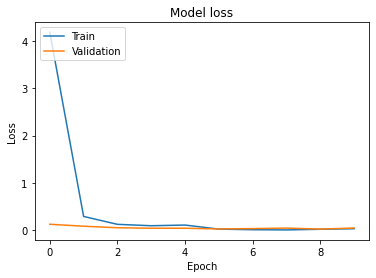

In [18]:
#plotting model performance

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [19]:
history.history['accuracy'][-1]

0.9930555820465088

In [20]:
model._name = 'AkinolaVGG16'

In [21]:
model.save('C:\\Users\\samsn\\Documents\\Projects\\Thesis\\data\\model')

INFO:tensorflow:Assets written to: C:\Users\samsn\Documents\Projects\Thesis\data\model\assets
